<a href="https://colab.research.google.com/github/Avifahdwicahyani/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tugas Praktikum**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
import glob
from google.colab.patches import cv2_imshow
from math import log10, sqrt, pow

1. Buat Gamma Correction

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


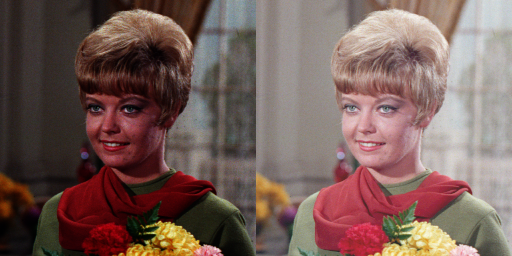

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Gambar diatas adalah citra yang diproses menggunakan Gamma Correction nilai gamma 3.

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst

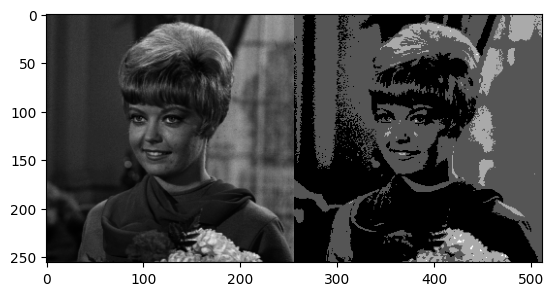

In [4]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

## **Jumlah Citra di Average 5**

nilai psnr-nya adalah:  19.523369398918792  dB


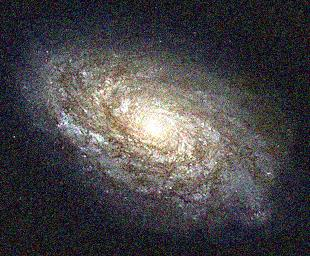

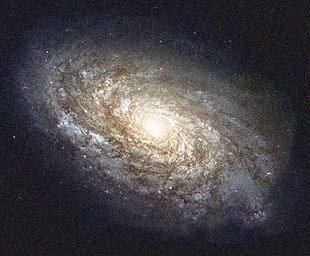

In [7]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

img_asli = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar = 5
for i in range(jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlahGambar)

psnr = PSNR(img_asli,denoised_image)

print('nilai psnr-nya adalah: ',psnr,' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

## **Jumlah Citra di Average 30**

nilai psnr-nya adalah:  19.871688124753103  dB


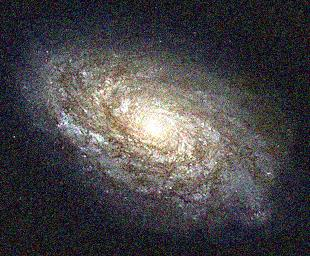

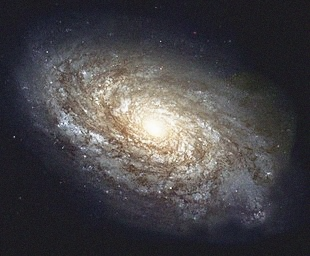

In [8]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

img_asli = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar = 30
for i in range(jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlahGambar)

psnr = PSNR(img_asli,denoised_image)

print('nilai psnr-nya adalah: ',psnr,' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

## **Jumlah Citra di Average 60**

nilai psnr-nya adalah:  19.90706025310072  dB


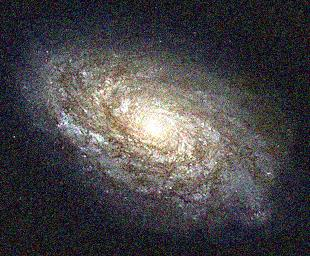

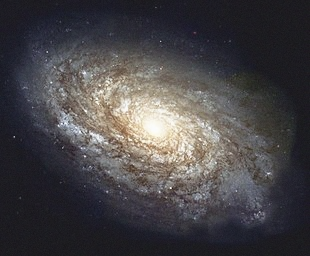

In [9]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

img_asli = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar = 60
for i in range(jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlahGambar)

psnr = PSNR(img_asli,denoised_image)

print('nilai psnr-nya adalah: ',psnr,' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

## **Jumlah Citra di Average 80**

nilai psnr-nya adalah:  19.91637977528085  dB


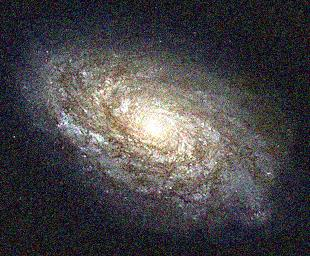

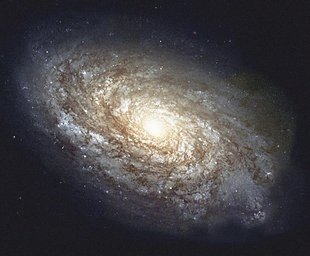

In [10]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

img_asli = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar = 80
for i in range(jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlahGambar)

psnr = PSNR(img_asli,denoised_image)

print('nilai psnr-nya adalah: ',psnr,' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

## **Jumlah Citra di Average 100**

nilai psnr-nya adalah:  19.92196095594035  dB


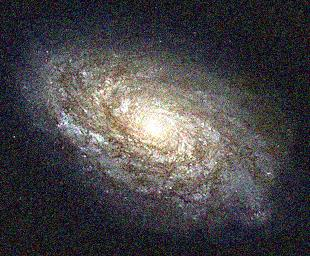

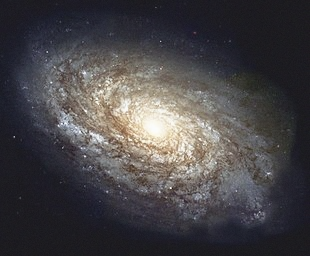

In [11]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

img_asli = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/noises/*.jpg'):
    n= cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar = 100
for i in range(jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlahGambar)

psnr = PSNR(img_asli,denoised_image)

print('nilai psnr-nya adalah: ',psnr,' dB')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Kesimpulannya adalah rata-rata hasil PSNR yang dihasilkan untuk setiap citra yang dilakukan Average Denoising tidak jauh berbeda yaitu di angka 19-20.



4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff).

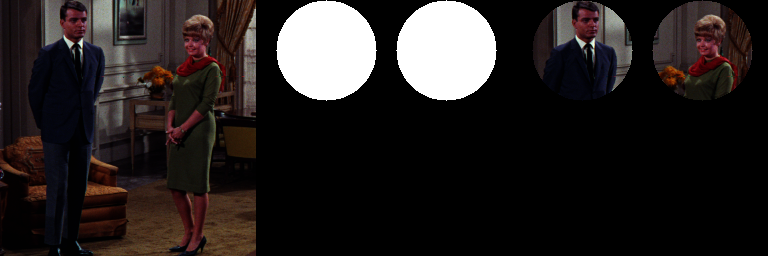

In [14]:
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
result = cv.bitwise_and(img, mask)
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain.

Operator or


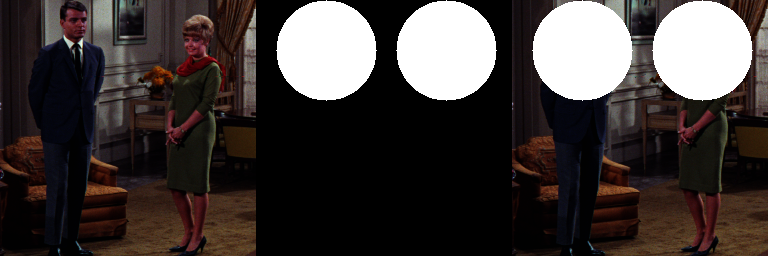


Operator not


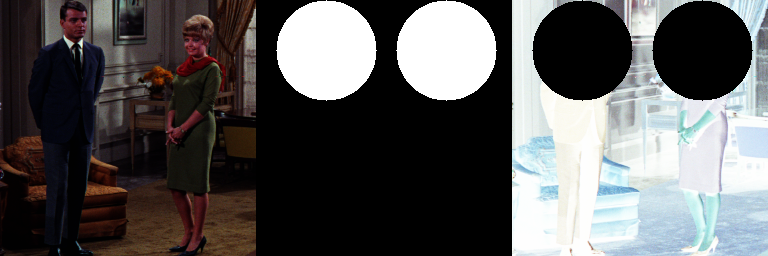


Operator nand


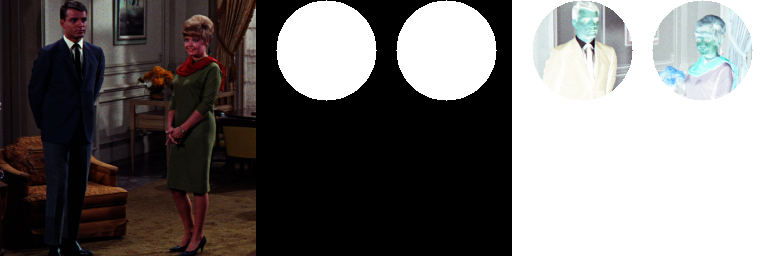


Operator xor


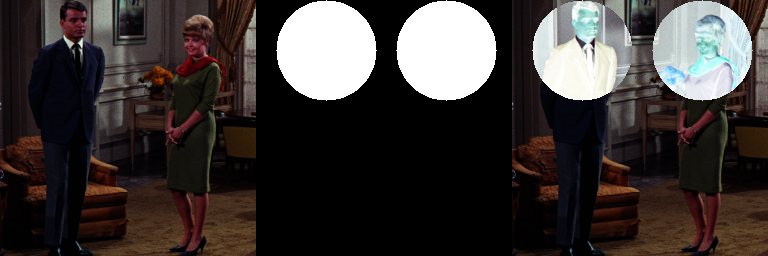

In [15]:
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Week5/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
result1 = cv.bitwise_or(img, mask)
result2 = ~img & ~mask
result3 = cv.bitwise_not(cv.bitwise_and(img, mask))
result4 = cv.bitwise_xor(img, mask)

# result[mask==0] = 255

print('Operator or')
final_frame1 = cv.hconcat((img, mask, result1))
cv2_imshow(final_frame1)

print('\nOperator not')
final_frame2 = cv.hconcat((img, mask, result2))
cv2_imshow(final_frame2)

print('\nOperator nand')
final_frame3 = cv.hconcat((img, mask, result3))
cv2_imshow(final_frame3)

print('\nOperator xor')
final_frame4 = cv.hconcat((img, mask, result4))
cv2_imshow(final_frame4)

* OR: menghasilkan hasil dari menggabungkan citra img dan mask.
* NOT: menghasilkan hasil dari gabungan kedua citra yang sudah dinegasi.
* NAND: menghasilkan gabungan kedua citra dan membalikkan hasil dari operasi AND.
* XOR: menggabungkan kedua citra namun hasil dari gabungannya dinegasi.